Data Loading

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/mobility_data.csv')


In [ ]:
# Grouping by origin city to find average number of journeys and travelers
origin_city_stats = data.groupby('provincia_origen_name').agg(
    avg_viajes_origin=('viajes', 'mean'),
    avg_viajeros_origin=('viajeros', 'mean')
).sort_values(by='avg_viajes_origin', ascending=False)


# Display the top and bottom cities for origin and destination
print("Top cities by average journeys (origin):")
print(origin_city_stats.head(10))

print("\nBottom cities by average journeys (origin):")
print(origin_city_stats.tail(10))


Top cities by average journeys (origin):
                       avg_viajes_origin  avg_viajeros_origin
provincia_origen_name                                        
Madrid                       8524.929496          8050.775497
Barcelona                    6660.497474          6337.067824
Toledo                       5260.375875          4919.498370
Girona                       4683.013292          4437.667398
Tarragona                    4407.694373          4233.558014
Valencia/Valéncia            4196.352991          4022.790204
Murcia                       3822.354155          3550.789170
Alicante                     3817.263535          3572.407550
Sevilla                      3664.619929          3503.496672
Castellón/Castelló           3652.286285          3509.875813

Bottom cities by average journeys (origin):
                        avg_viajes_origin  avg_viajeros_origin
provincia_origen_name                                         
Teruel                        1737.028053   

Numero de viajes/viajeros por dia de semana

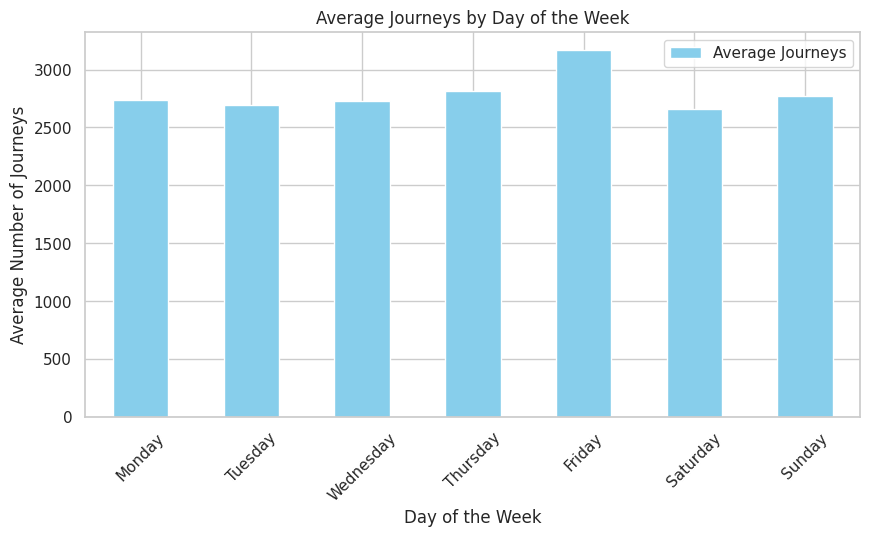

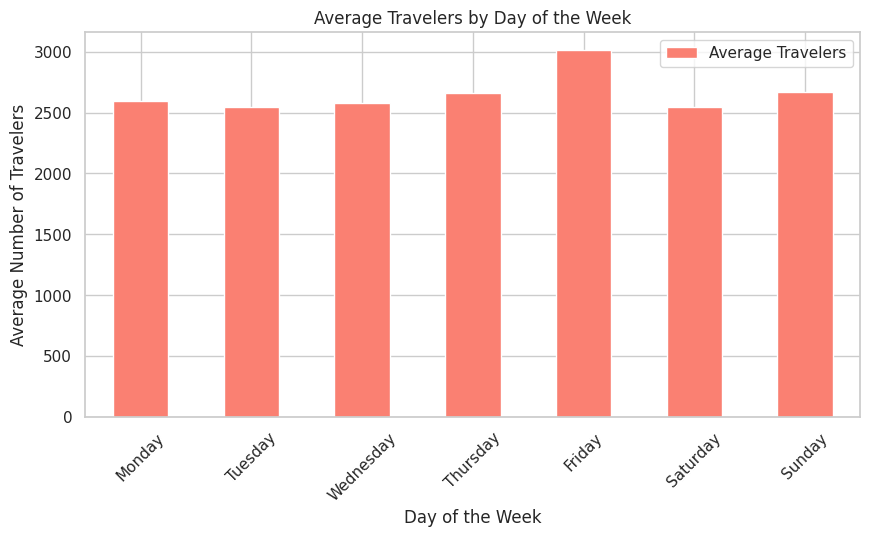

In [ ]:
# Datetime format for the column
data['day'] = pd.to_datetime(data['day'])

# Extract day of the week (0 = Monday, 6 = Sunday) and month
data['day_of_week'] = data['day'].dt.dayofweek
data['month'] = data['day'].dt.month

# Group by day of the week to find average journeys and travelers
daily_trends = data.groupby('day_of_week').agg(
    avg_viajes=('viajes', 'mean'),
    avg_viajeros=('viajeros', 'mean')
)

# Rename day numbers to weekday names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
daily_trends.index = daily_trends.index.map(day_names)

# Plot average journeys by day of the week
plt.figure(figsize=(10, 5))
daily_trends['avg_viajes'].plot(kind='bar', color='skyblue', label='Average Journeys')
plt.title('Average Journeys by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Journeys')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot average travelers by day of the week
plt.figure(figsize=(10, 5))
daily_trends['avg_viajeros'].plot(kind='bar', color='salmon', label='Average Travelers')
plt.title('Average Travelers by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Travelers')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Top 5 fechas por numero de viajes/viajeros

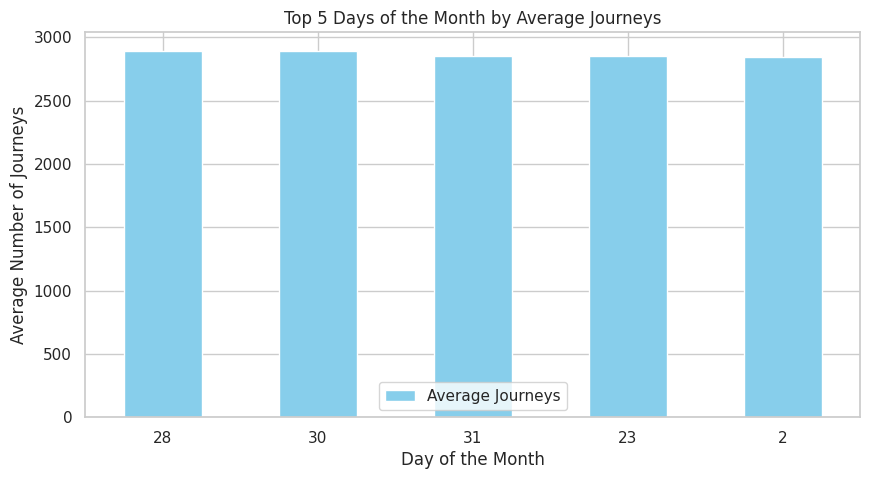

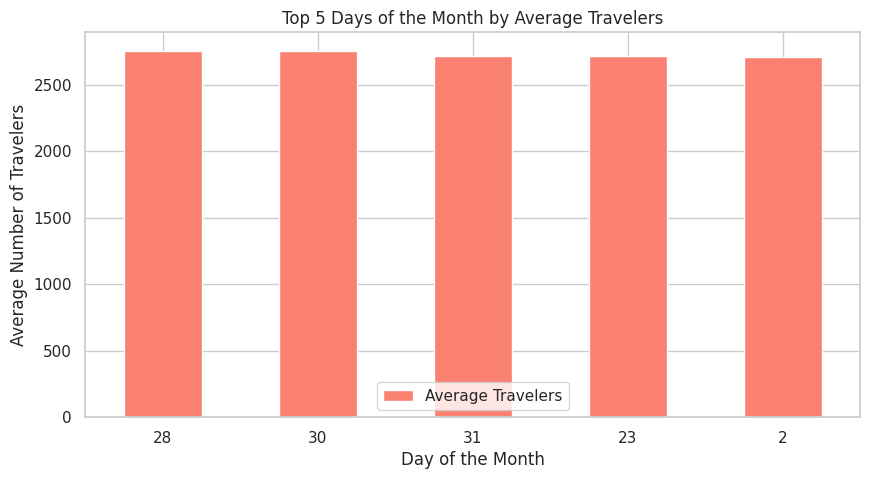

In [ ]:
# Extract the day of the month
data['day_of_month'] = data['day'].dt.day

# Group by day of the month to calculate average journeys and travelers
monthly_trends = data.groupby('day_of_month').agg(
    avg_viajes=('viajes', 'mean'),
    avg_viajeros=('viajeros', 'mean')
)

# Sort by average journeys to get the top 7 days with the highest average journeys
top_days_viajes = monthly_trends.sort_values(by='avg_viajes', ascending=False).head(5)
top_days_viajeros = monthly_trends.sort_values(by='avg_viajeros', ascending=False).head(5)

# Plotting top 5 days of the month with the highest average journeys
plt.figure(figsize=(10, 5))
top_days_viajes['avg_viajes'].plot(kind='bar', color='skyblue', label='Average Journeys')
plt.title('Top 5 Days of the Month by Average Journeys')
plt.xlabel('Day of the Month')
plt.ylabel('Average Number of Journeys')
plt.xticks(rotation=0)
plt.legend()
plt.show()

# Plotting top 5 days of the month with the highest average travelers
plt.figure(figsize=(10, 5))
top_days_viajeros['avg_viajeros'].plot(kind='bar', color='salmon', label='Average Travelers')
plt.title('Top 5 Days of the Month by Average Travelers')
plt.xlabel('Day of the Month')
plt.ylabel('Average Number of Travelers')
plt.xticks(rotation=0)
plt.legend()
plt.show()

Trends semanales/de temporada

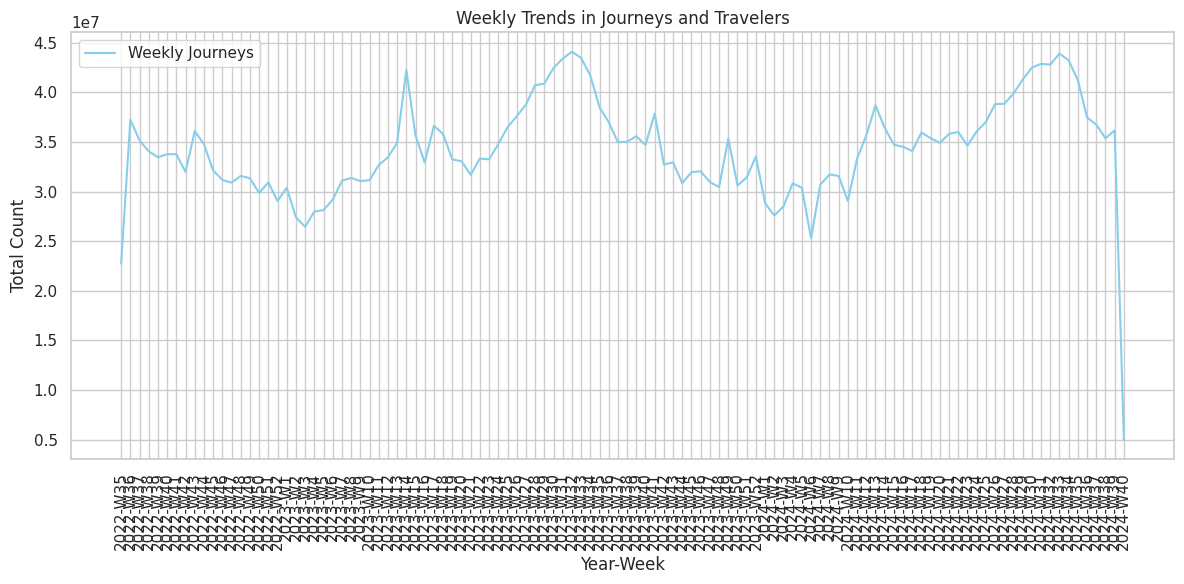

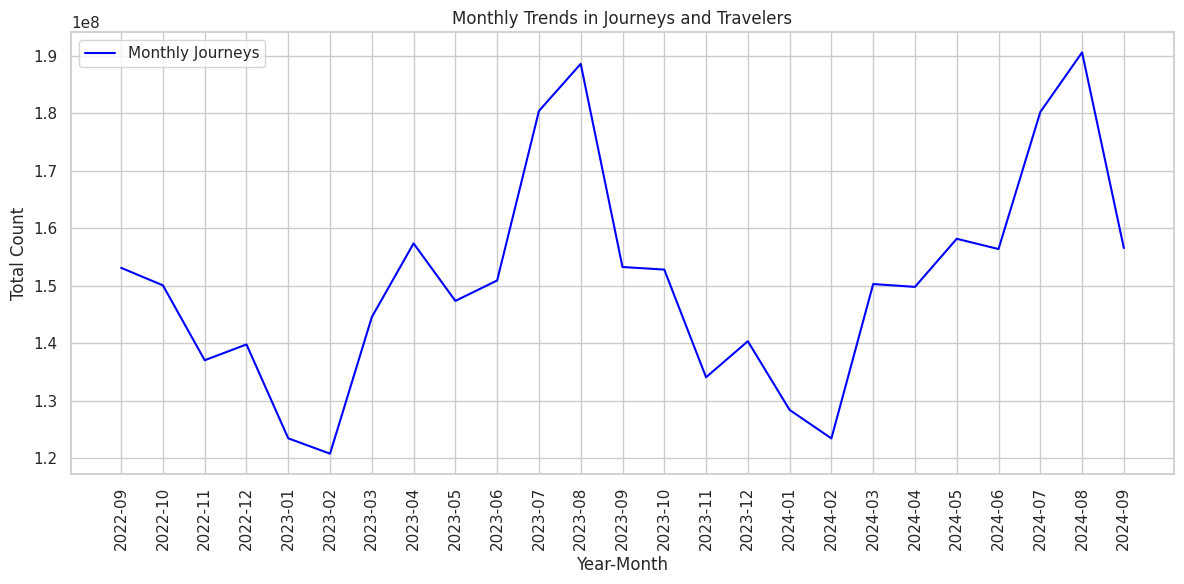

In [ ]:
# Extract additional features: week, month, and year
data['week'] = data['day'].dt.isocalendar().week  # ISO week number
data['month'] = data['day'].dt.month
data['year'] = data['day'].dt.year

# Aggregate data by week to observe weekly trends in journeys and travelers
weekly_trends = data.groupby(['year', 'week']).agg(
    weekly_viajes=('viajes', 'sum'),
    weekly_viajeros=('viajeros', 'sum')
).reset_index()

# Aggregate data by month to observe monthly trends in journeys and travelers
monthly_trends = data.groupby(['year', 'month']).agg(
    monthly_viajes=('viajes', 'sum'),
    monthly_viajeros=('viajeros', 'sum')
).reset_index()

# PLOTS

# Plot weekly trends viajes

plt.figure(figsize=(12, 6))
# Combine year and week for x-axis labels
weekly_trends['year_week'] = weekly_trends['year'].astype(str) + '-W' + weekly_trends['week'].astype(str)
plt.plot(weekly_trends['year_week'], weekly_trends['weekly_viajes'], label='Weekly Journeys', color='skyblue')
plt.title('Weekly Trends in Journeys and Travelers')
plt.xlabel('Year-Week')
plt.ylabel('Total Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()


# Plot monthly trends viajes
plt.figure(figsize=(12, 6))
# Combine year and month for x-axis labels
monthly_trends['year_month'] = monthly_trends['year'].astype(str) + '-' + monthly_trends['month'].astype(str).str.zfill(2)
plt.plot(monthly_trends['year_month'], monthly_trends['monthly_viajes'], label='Monthly Journeys', color='blue')
plt.title('Monthly Trends in Journeys and Travelers')
plt.xlabel('Year-Month')
plt.ylabel('Total Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

Holiday trends

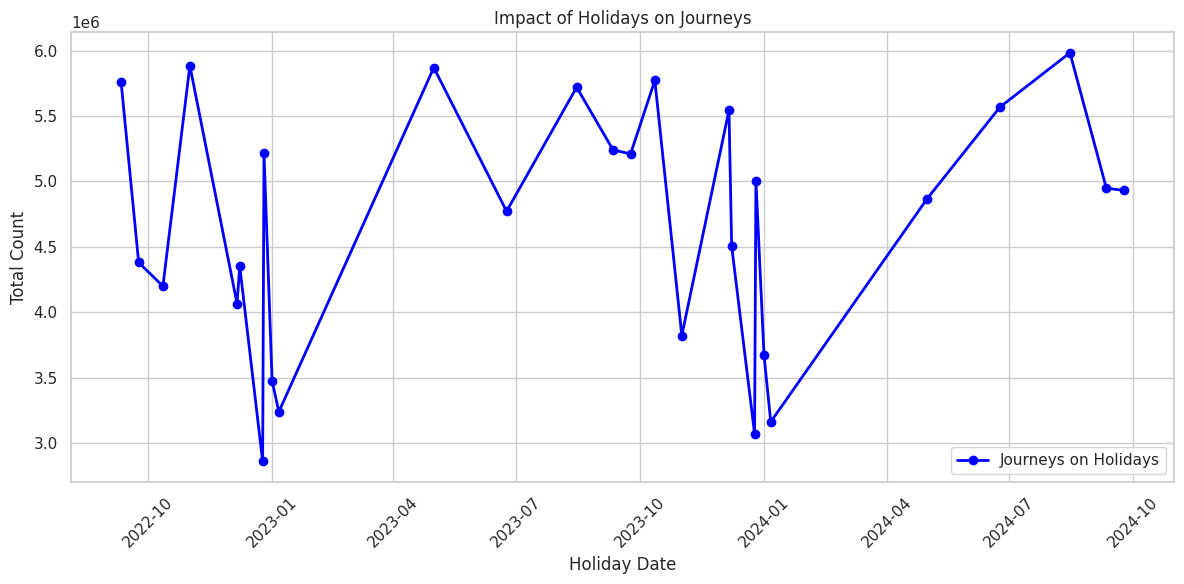

In [ ]:
# Define holiday dates (example list)
holidays = ['2022-01-01', '2022-01-06', '2022-05-01', '2022-06-24', '2022-08-15', '2022-09-11', '2022-09-24', '2022-10-12', '2022-11-01', '2022-12-06', '2022-12-08', '2022-12-25', '2022-12-26',
            '2023-01-01', '2023-01-06', '2023-05-01', '2023-06-24', '2023-08-15', '2023-09-11', '2023-09-24', '2023-10-12', '2023-11-01', '2023-12-06', '2023-12-08', '2023-12-25', '2023-12-26',
            '2024-01-01', '2024-01-06', '2024-05-01', '2024-06-24', '2024-08-15', '2024-09-11', '2024-09-24', '2024-10-12', '2024-11-01', '2024-12-06', '2024-12-08', '2024-12-25', '2024-12-26']  # holiday dates
holidays = pd.to_datetime(holidays)

# Create a holiday flag in the data
data['is_holiday'] = data['day'].isin(holidays)

# Analyze the impact of holidays on traffic
holiday_trends = data[data['is_holiday']].groupby('day').agg(
    holiday_viajes=('viajes', 'sum'),
).reset_index()


plt.figure(figsize=(12, 6))
plt.plot(holiday_trends['day'], holiday_trends['holiday_viajes'], marker='o', color='blue', label='Journeys on Holidays', linewidth=2)
plt.title('Impact of Holidays on Journeys')
plt.xlabel('Holiday Date')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Origin-Destination heatmap

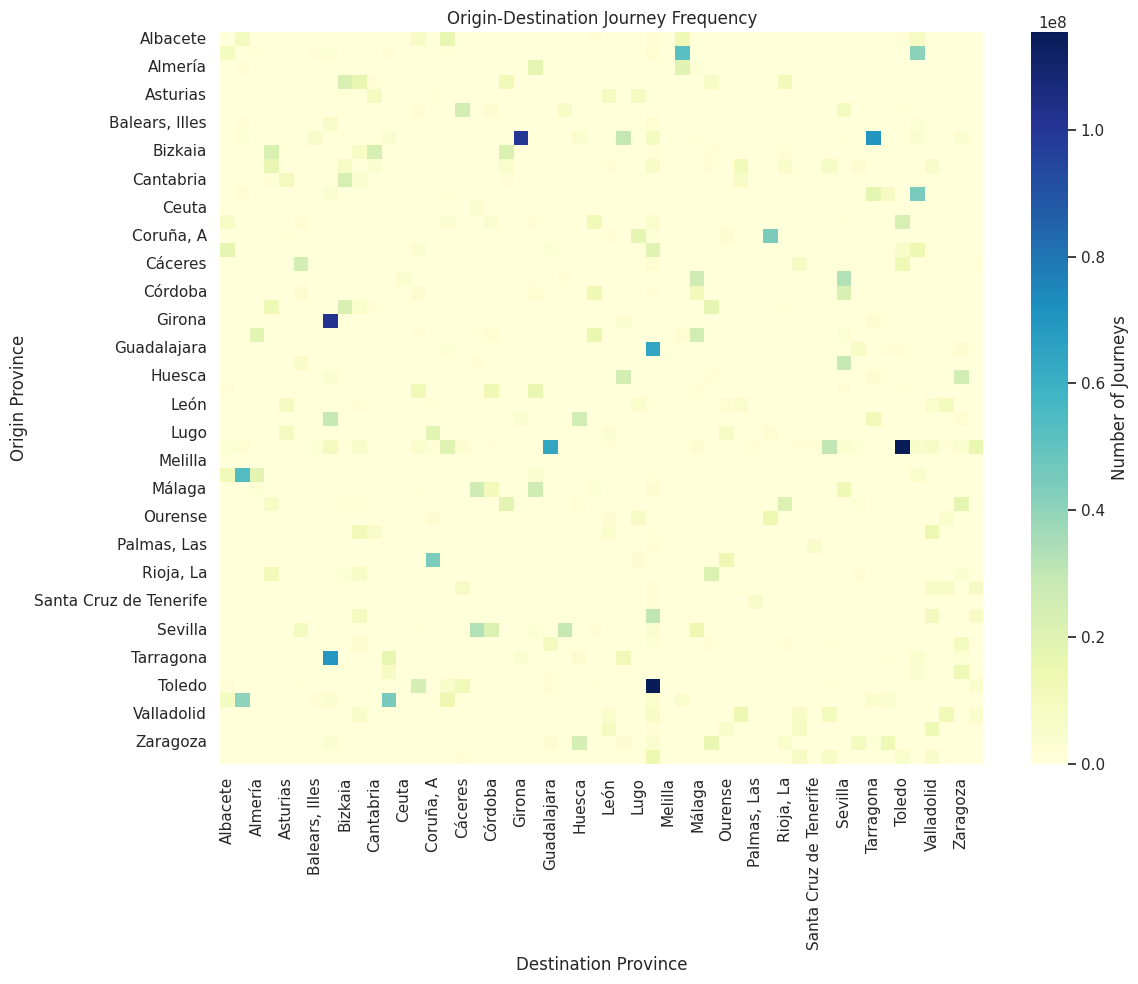

In [ ]:
# Matrix to count the frequency of journeys between origin and destination pairs
od_matrix = data.pivot_table(index='provincia_origen_name',
                              columns='provincia_destino_name',
                              values='viajes',
                              aggfunc='sum',
                              fill_value=0)


# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(od_matrix, cmap='YlGnBu', annot=False, fmt='g', cbar_kws={'label': 'Number of Journeys'})
# Set the title and labels
plt.title('Origin-Destination Journey Frequency')
plt.xlabel('Destination Province')
plt.ylabel('Origin Province')

# Show the heatmap
plt.tight_layout()
plt.show()

Seasonal trends para top 10 ciudades por numero de viajes

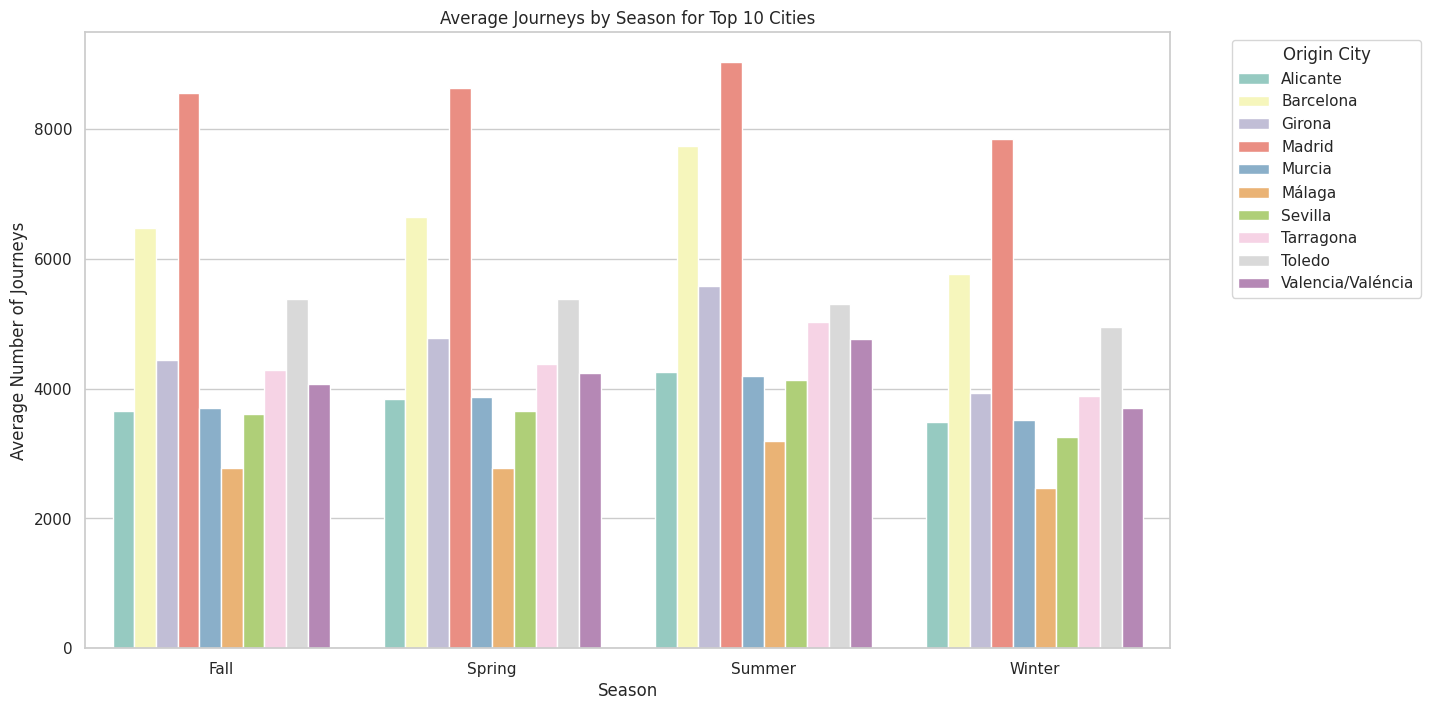

In [ ]:
# Define a function to categorize months into seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a 'season' column
data['season'] = data['day'].dt.month.apply(get_season)

# Group by city and season to calculate average journeys and travelers
seasonal_trends = data.groupby(['provincia_origen_name', 'season']).agg(
    avg_viajes=('viajes', 'mean'),
).reset_index()

# Calculate total journeys per city
total_journeys = data.groupby('provincia_origen_name').agg(
    total_viajes=('viajes', 'sum')
).reset_index()

# Get the top 10 cities with the largest number of journeys
top_10_cities = total_journeys.nlargest(10, 'total_viajes')['provincia_origen_name']

top_10_seasonal_trends = seasonal_trends[seasonal_trends['provincia_origen_name'].isin(top_10_cities)]


# Set the style for seaborn
sns.set(style="whitegrid")

# Create a bar plot for average journeys by season for each of the top 10 cities
plt.figure(figsize=(14, 8))
sns.barplot(x='season', y='avg_viajes', hue='provincia_origen_name', data=top_10_seasonal_trends, palette='Set3')

# Set titles and labels
plt.title('Average Journeys by Season for Top 10 Cities')
plt.xlabel('Season')
plt.ylabel('Average Number of Journeys')
plt.legend(title='Origin City', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


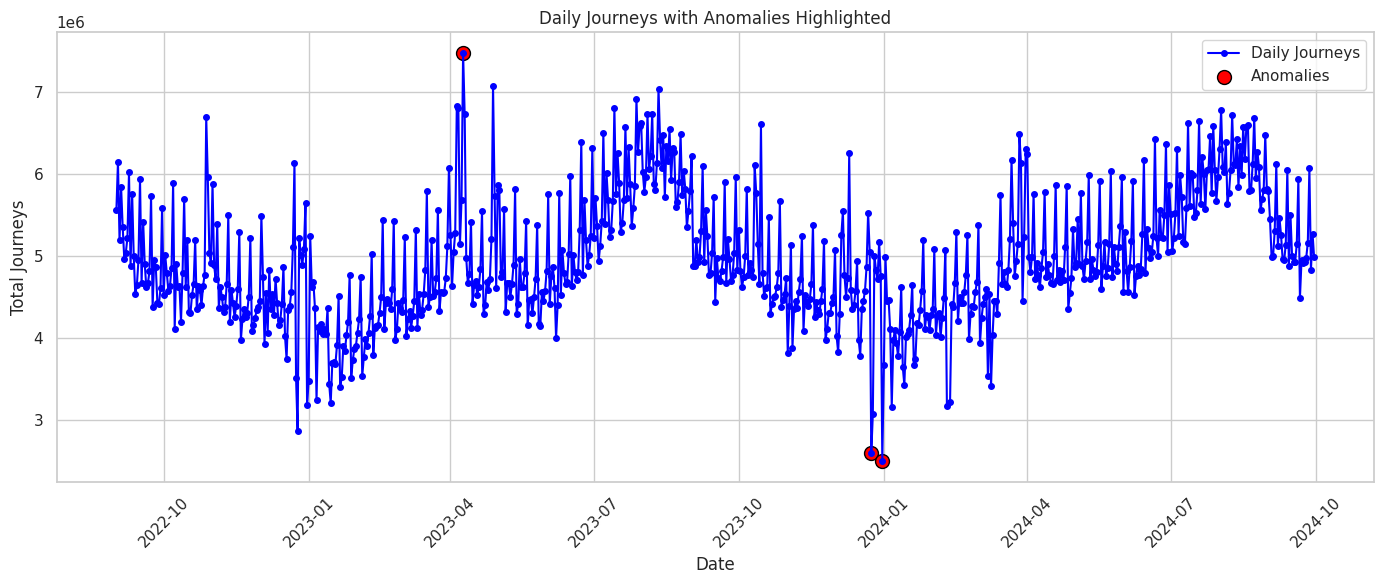

In [ ]:
# Calculate total journeys per day
daily_traffic = data.groupby('day').agg(total_journeys=('viajes', 'sum')).reset_index()

# Calculate Z-scores to identify anomalies
daily_traffic['z_score'] = (daily_traffic['total_journeys'] - daily_traffic['total_journeys'].mean()) / daily_traffic['total_journeys'].std()

# Define a threshold for anomaly detection
threshold = 3  # Common threshold for Z-score
anomalies = daily_traffic[np.abs(daily_traffic['z_score']) > threshold]

# Plot daily journeys with anomalies highlighted
plt.figure(figsize=(14, 6))
plt.plot(daily_traffic['day'], daily_traffic['total_journeys'], marker='o', label='Daily Journeys', color='blue', markersize=4)

# Highlight anomalies
plt.scatter(anomalies['day'], anomalies['total_journeys'], color='red', label='Anomalies', s=100, edgecolor='black')

# Set titles and labels
plt.title('Daily Journeys with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Total Journeys')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
